In [8]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import seaborn as sns
from scipy import stats
import os
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

import matplotlib
matplotlib.rcParams[u'font.sans-serif'] = ['SimHei'] # 指定默认字体
matplotlib.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

In [29]:
# 读取数据

# date_list_all = []
# date_list_extra = []
# data_folder = os.walk(r"data")  
# for path,dir_list,file_list in data_folder:  
#     for file_name in file_list:  
#         if file_name[:11] == "beijing_all" or file_name[:13] == "beijing_extra":
#             path_now = os.path.join(path, file_name)
            
#             try:
#                 data_now = pd.read_csv(path_now)
#                 a = data_now['date'] 
#                 print(path_now)
#                 if file_name[:11] == "beijing_all" :
#                     date_list_all.append(path_now)
#                 elif file_name[:13] == "beijing_extra" :
#                     date_list_extra.append(path_now)
#             # 跳过异常编码的文件 eg: beijing_all_20141231.csv
#             # 跳过异常内容文件 eg. beijing_all_20170703.csv -- 08
#             except:
#                 pass

# date_list_all.sort()
# date_list_extra.sort()
# data_all = pd.read_csv(date_list_all[0])
# data_extra = pd.read_csv(date_list_extra[0])
# for i in range(1,len(date_list_all)):
#     print(date_list_all[i])
#     data_now = pd.read_csv(date_list_all[i])
#     data_all = pd.concat([data_all, data_now], axis=0)
# for i in range(1,len(date_list_extra)):
#     print(date_list_extra[i])
#     data_now = pd.read_csv(date_list_extra[i])
#     data_extra = pd.concat([data_extra, data_now], axis=0)
    

# data_all.to_csv("data_all.csv")
# data_extra.to_csv("data_extra.csv")

In [126]:
data_all = pd.read_csv("data_all.csv")
data_extra = pd.read_csv("data_extra.csv")

# 删去无用的第一列
data_all = data_all.iloc[:,1:]
data_extra = data_extra.iloc[:,1:]

In [140]:
np.unique(data_all['type']).tolist()

['AQI', 'PM10', 'PM10_24h', 'PM2.5', 'PM2.5_24h']

In [141]:
# 查看数据缺失情况
# feature_list_all = ['PM2.5','PM2.5_24h','PM10','PM10_24h','AQI']
feature_list_all = np.unique(data_all['type']).tolist()
nan_rate = DataFrame()
for fea in feature_list_all:
    data_fea = data_all[data_all['type']==fea].iloc[:,3:]
    nan_count_fea = data_fea.isnull().sum()
    nan_rate_fea = DataFrame({fea: nan_count_fea / data_fea.shape[0]})
    nan_rate = pd.concat([nan_rate,nan_rate_fea],axis=1)
# feature_list_extra = ['SO2','SO2_24h','NO2','NO2_24h','O3','O3_24h','CO','CO_24h']   
feature_list_extra = np.unique(data_extra['type']).tolist()
for fea in feature_list_extra:
    data_fea = data_extra[data_extra['type']==fea].iloc[:,3:]
    nan_count_fea = data_fea.isnull().sum()
    nan_rate_fea = DataFrame({fea: nan_count_fea / data_fea.shape[0]})
    nan_rate = pd.concat([nan_rate,nan_rate_fea],axis=1)

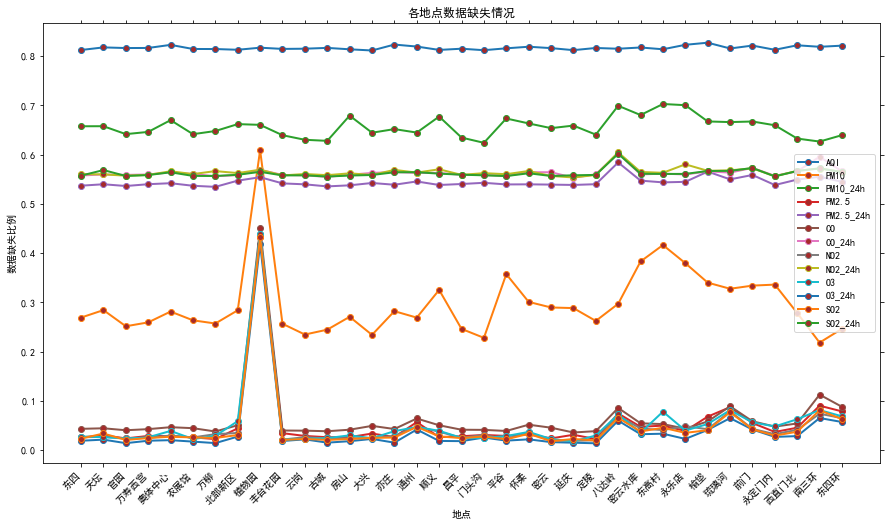

In [142]:
# 设置图框的大小
fig = plt.figure(figsize = (15,9))
# 绘图
plt.plot(nan_rate._stat_axis.values, # x轴数据
         nan_rate.iloc[:,:], # y轴数据
         linestyle = '-', # 折线类型
         linewidth = 2, # 折线宽度
#          color = 'steelblue', # 折线颜色
         marker = 'o', # 点的形状
         markersize = 6, # 点的大小
#          markeredgecolor='black', # 点的边框色
         markerfacecolor='brown') # 点的填充色
# 添加标题和坐标轴标签
plt.title('各地点数据缺失情况')
plt.xlabel('地点')
plt.ylabel('数据缺失比例')

# 剔除图框上边界和右边界的刻度
plt.tick_params(top = 'off', right = 'off')
# 为了避免x轴日期刻度标签的重叠，设置x轴刻度自动展现，并且45度倾斜
fig.autofmt_xdate(rotation = 45)
# 设置图例
plt.legend(nan_rate.columns.values)
# 显示图形
plt.show()

# 从图上可以看出['PM2.5','AQI', 'SO2', ,'NO2', , 'O3', 'CO']缺失较少
#             ['PM2.5_24h','PM10_24h','SO2_24h','NO2_24h', 'CO_24h','PM10']缺失较多
# 且植物园的数据一直缺失较多

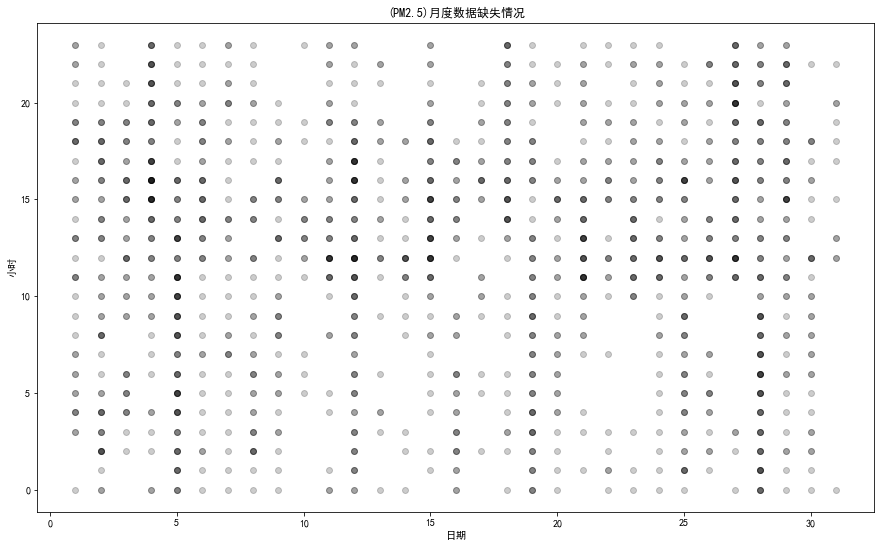

In [77]:
X_date = data_all[data_all['type']=='PM2.5'].iloc[:,0:2][data_all[data_all['type']=='PM2.5']['东四'].isnull()]['date'].values
Y_hour = data_all[data_all['type']=='PM2.5'].iloc[:,0:2][data_all[data_all['type']=='PM2.5']['东四'].isnull()]['hour'].values

X_day = np.zeros(X_date.shape)
for i in range(X_date.shape[0]):
    X_day[i] = str(X_date[i])[6:8]
    
fig = plt.figure(figsize = (15,9))
plt.scatter(X_day, Y_hour, alpha=0.2,c='k')
plt.title('(PM2.5)月度数据缺失情况')
plt.xlabel('日期')
plt.ylabel('小时')

plt.show()

In [132]:
# 查看数据缺失情况
feature_list_all = ['PM2.5','PM2.5_24h','PM10','PM10_24h','AQI']
num_pm25 = data_all[data_all['type']=='PM2.5'].shape[0]
for fea in feature_list_all:
    num_fea = data_all[data_all['type']==fea].shape[0]
    print(fea+': '+str(num_fea/num_pm25))
feature_list_extra = ['SO2','SO2_24h','NO2','NO2_24h','O3','O3_24h','CO','CO_24h']   
for fea in feature_list_extra:
    num_fea = data_extra[data_extra['type']==fea].shape[0]
    print(fea+': '+str(num_fea/num_pm25))

PM2.5: 1.0
PM2.5_24h: 0.9999815239080629
PM10: 0.9999630478161259
PM10_24h: 0.9999630478161259
AQI: 0.9999630478161259
SO2: 0.9605165915305595
SO2_24h: 0.9605165915305595
NO2: 0.9605165915305595
NO2_24h: 0.9605165915305595
O3: 0.9605165915305595
O3_24h: 0.9517589239524056
CO: 0.9605165915305595
CO_24h: 0.9605165915305595


In [144]:
data_all[data_all['type']=='PM2.5'].shape[1]

38

In [146]:
data_all['flag']=False

In [148]:
data_all[]

,date,hour,type,东四,天坛,官园,万寿西宫,奥体中心,农展馆,万柳,...,东高村,永乐店,榆垡,琉璃河,前门,永定门内,西直门北,南三环,东四环,flag


In [150]:
data_all['flag'].sum()

0

In [ ]:
# 可以说明“逐小时”缺失情况

In [4]:
# 数据预处理
data_all_pm25 = data_all[data_all['type']=='PM2.5'].iloc[:,3:]
# data_extra_so2 = data_extra[data_extra['type']=='SO2'].iloc[:,3:]

In [30]:
# print(data_all_pm25['东四'][data_all_pm25['东四'].isnull()])

In [6]:
data_all_pm25_filled = data_all_pm25.fillna(method='ffill')
data_all_pm25_filled = data_all_pm25_filled.fillna(method='bfill')

In [7]:
df_train = data_all_pm25_filled
na_count = df_train.isnull().sum().sort_values(ascending=False)
na_rate = na_count / len(df_train)
na_data = pd.concat([na_count,na_rate],axis=1,keys=['count','ratio'])
na_data

,count,ratio
东四环,0,0.0
植物园,0,0.0
亦庄,0,0.0
大兴,0,0.0
房山,0,0.0
古城,0,0.0
云岗,0,0.0
丰台花园,0,0.0
北部新区,0,0.0
顺义,0,0.0


In [33]:
data_all_pm25_filled

,东四,天坛,官园,万寿西宫,奥体中心,农展馆,万柳,北部新区,植物园,丰台花园,...,密云水库,东高村,永乐店,榆垡,琉璃河,前门,永定门内,西直门北,南三环,东四环
0,3.0,7.7,5.7,3.0,13.7,12.5,6.9,7.2,3.0,3.1,...,5.3,20.3,44.4,8.3,139.2,13.2,9.6,14.4,7.0,20.5
5,5.2,3.7,7.9,3.0,11.4,8.1,3.4,6.8,4.6,4.9,...,6.2,13.3,37.9,23.6,184.6,5.6,7.9,9.5,9.2,32.0
10,4.4,11.2,3.8,3.9,13.6,7.4,3.0,7.6,7.7,4.8,...,5.8,8.3,43.0,40.6,230.4,5.5,5.6,7.0,4.9,12.7
15,3.0,3.5,4.9,4.2,10.1,7.5,4.5,5.8,9.2,4.0,...,3.0,7.9,19.2,90.5,153.1,5.9,6.7,3.7,7.6,19.8
20,4.0,6.1,3.0,4.4,12.9,11.5,4.4,6.4,3.3,6.2,...,3.0,4.0,30.6,102.2,159.8,8.9,6.6,6.4,3.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,10.0,8.0,4.0,13.0,9.0,11.0,12.0,25.0,6.0,8.0,...,7.0,15.0,16.0,23.0,208.0,10.0,11.0,14.0,10.0,15.0
30,8.0,5.0,10.0,3.0,8.0,8.0,13.0,26.0,8.0,13.0,...,5.0,15.0,15.0,29.0,189.0,8.0,11.0,16.0,10.0,11.0
35,15.0,10.0,8.0,12.0,12.0,8.0,14.0,22.0,17.0,12.0,...,8.0,15.0,13.0,38.0,192.0,6.0,13.0,14.0,14.0,17.0
40,18.0,12.0,15.0,12.0,12.0,11.0,14.0,37.0,14.0,19.0,...,7.0,15.0,19.0,35.0,186.0,15.0,12.0,26.0,15.0,13.0


Text(0, 0.5, 'Probability Density')

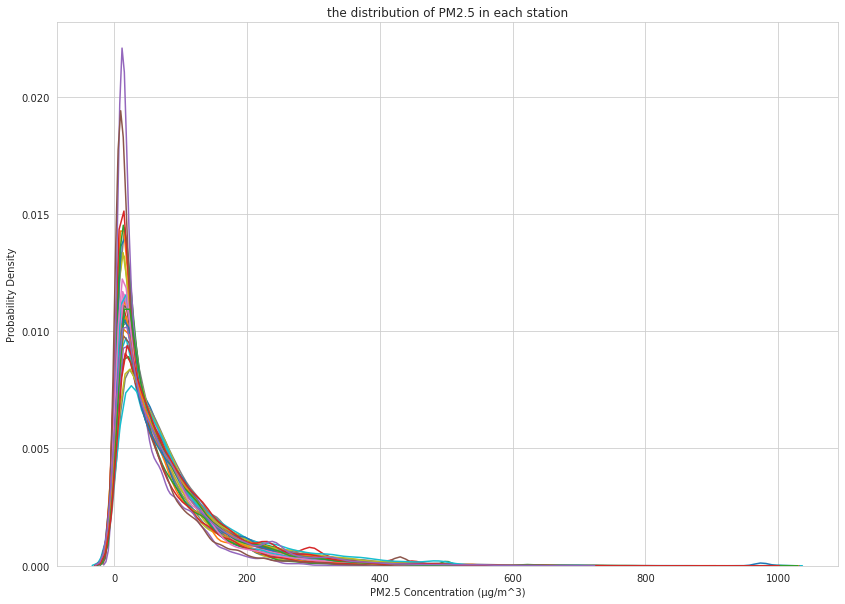

In [24]:
fig, ax= plt.subplots(1,1,figsize = (14, 10))
sns.set_style('whitegrid')
for i in range(35):
    sns.distplot(data_all_pm25_filled.iloc[:,i],hist = False) 
ax.set_title('the distribution of PM2.5 in each station')
ax.set_xlabel("PM2.5 Concentration (μg/m^3)")
ax.set_ylabel("Probability Density")
# fig.savefig('sns_style_origin.jpg', dpi=100, bbox_inches='tight')

Text(0, 0.5, 'Probability Density')

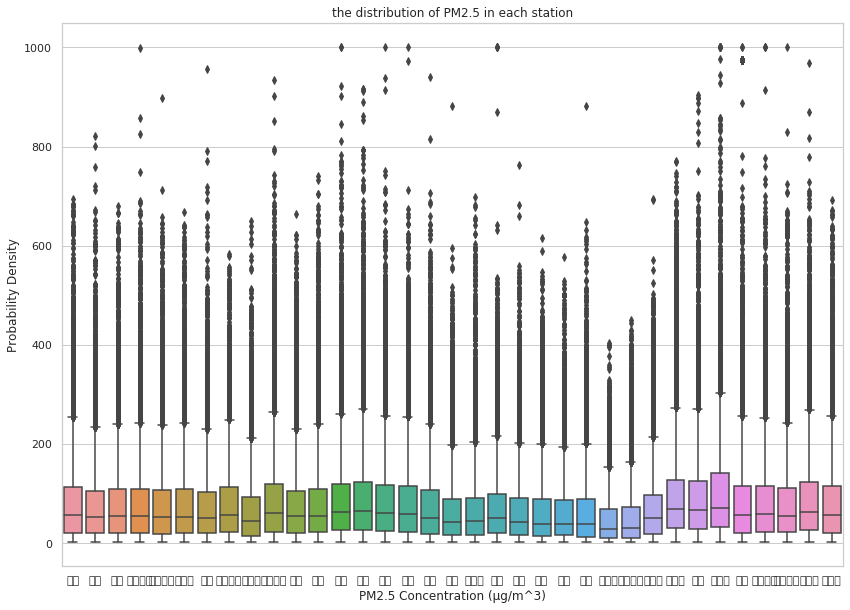

In [28]:
fig, ax= plt.subplots(1,1,figsize = (14, 10))
sns.set_style('whitegrid')
sns.boxplot(data=data_all_pm25_filled.iloc[:,0:35])
ax.set_title('the distribution of PM2.5 in each station')
ax.set_xlabel("PM2.5 Concentration (μg/m^3)")
ax.set_ylabel("Probability Density")

In [14]:
# fig, ax1= plt.subplots(figsize = (14, 10))
# sns.set_style('whitegrid')
# sns.boxplot(data = data_all_pm25_filled[['东四','天坛']])

# sns.catplot(kind="box", data=data_all_pm25_filled.iloc[:,0:35])
# ax.set_titles('the distribution of PM2.5 in each station')
# ax.set_xlabel("PM2.5 Concentration (μg/m^3)")
# ax.set_ylabel("Probability Density")

In [20]:
data_all_pm25_filled

,东四,天坛,官园,万寿西宫,奥体中心,农展馆,万柳,北部新区,植物园,丰台花园,...,密云水库,东高村,永乐店,榆垡,琉璃河,前门,永定门内,西直门北,南三环,东四环
0,3.0,7.7,5.7,3.0,13.7,12.5,6.9,7.2,3.0,3.1,...,5.3,20.3,44.4,8.3,139.2,13.2,9.6,14.4,7.0,20.5
5,5.2,3.7,7.9,3.0,11.4,8.1,3.4,6.8,4.6,4.9,...,6.2,13.3,37.9,23.6,184.6,5.6,7.9,9.5,9.2,32.0
10,4.4,11.2,3.8,3.9,13.6,7.4,3.0,7.6,7.7,4.8,...,5.8,8.3,43.0,40.6,230.4,5.5,5.6,7.0,4.9,12.7
15,3.0,3.5,4.9,4.2,10.1,7.5,4.5,5.8,9.2,4.0,...,3.0,7.9,19.2,90.5,153.1,5.9,6.7,3.7,7.6,19.8
20,4.0,6.1,3.0,4.4,12.9,11.5,4.4,6.4,3.3,6.2,...,3.0,4.0,30.6,102.2,159.8,8.9,6.6,6.4,3.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,10.0,8.0,4.0,13.0,9.0,11.0,12.0,25.0,6.0,8.0,...,7.0,15.0,16.0,23.0,208.0,10.0,11.0,14.0,10.0,15.0
30,8.0,5.0,10.0,3.0,8.0,8.0,13.0,26.0,8.0,13.0,...,5.0,15.0,15.0,29.0,189.0,8.0,11.0,16.0,10.0,11.0
35,15.0,10.0,8.0,12.0,12.0,8.0,14.0,22.0,17.0,12.0,...,8.0,15.0,13.0,38.0,192.0,6.0,13.0,14.0,14.0,17.0
40,18.0,12.0,15.0,12.0,12.0,11.0,14.0,37.0,14.0,19.0,...,7.0,15.0,19.0,35.0,186.0,15.0,12.0,26.0,15.0,13.0
